# Download Dataset 

In [87]:
import kagglehub

dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Dataset downloaded.')


Dataset downloaded.


# Dataset Loading and Preprocessing

In [88]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [89]:
print(os.listdir(dataset))

['animals', 'images']


In [90]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'cats', 'dogs', 'images', 'panda']


In [91]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['cats', 'dogs', 'panda']


In [92]:
categories = os.listdir(dataset)
print(categories)

['cats', 'dogs', 'panda']


In [93]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00011.jpg', 'cats_00012.jpg', 'cats_00013.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00016.jpg', 'cats_00017.jpg', 'cats_00018.jpg', 'cats_00019.jpg', 'cats_00020.jpg', 'cats_00021.jpg', 'cats_00022.jpg', 'cats_00023.jpg', 'cats_00024.jpg', 'cats_00025.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00028.jpg', 'cats_00029.jpg', 'cats_00030.jpg', 'cats_00031.jpg', 'cats_00032.jpg', 'cats_00033.jpg', 'cats_00034.jpg', 'cats_00035.jpg', 'cats_00036.jpg', 'cats_00037.jpg', 'cats_00038.jpg', 'cats_00039.jpg', 'cats_00040.jpg', 'cats_00041.jpg', 'cats_00042.jpg', 'cats_00043.jpg', 'cats_00044.jpg', 'cats_00045.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00048.jpg', 'cats_00049.jpg', 'cats_00050.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00053.jpg', 'cats_00054.jpg', 'cats_00055.jpg', 'cats_00

In [94]:
import random

train_data = []
max_images_per_class = 100

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)

    image_files = os.listdir(path)[:max_images_per_class]

    for img in tqdm(image_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is None:
            continue

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (32, 32))
        train_data.append((img_array, label))

Loading panda: 100%|██████████| 100/100 [00:00<00:00, 109.64it/s]


In [95]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [96]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [97]:
np.random.shuffle(train_data)

In [98]:
print([train_data[i][1] for i in range(10)])

[1, 1, 1, 1, 0, 2, 0, 1, 0, 0]


# Visualizing

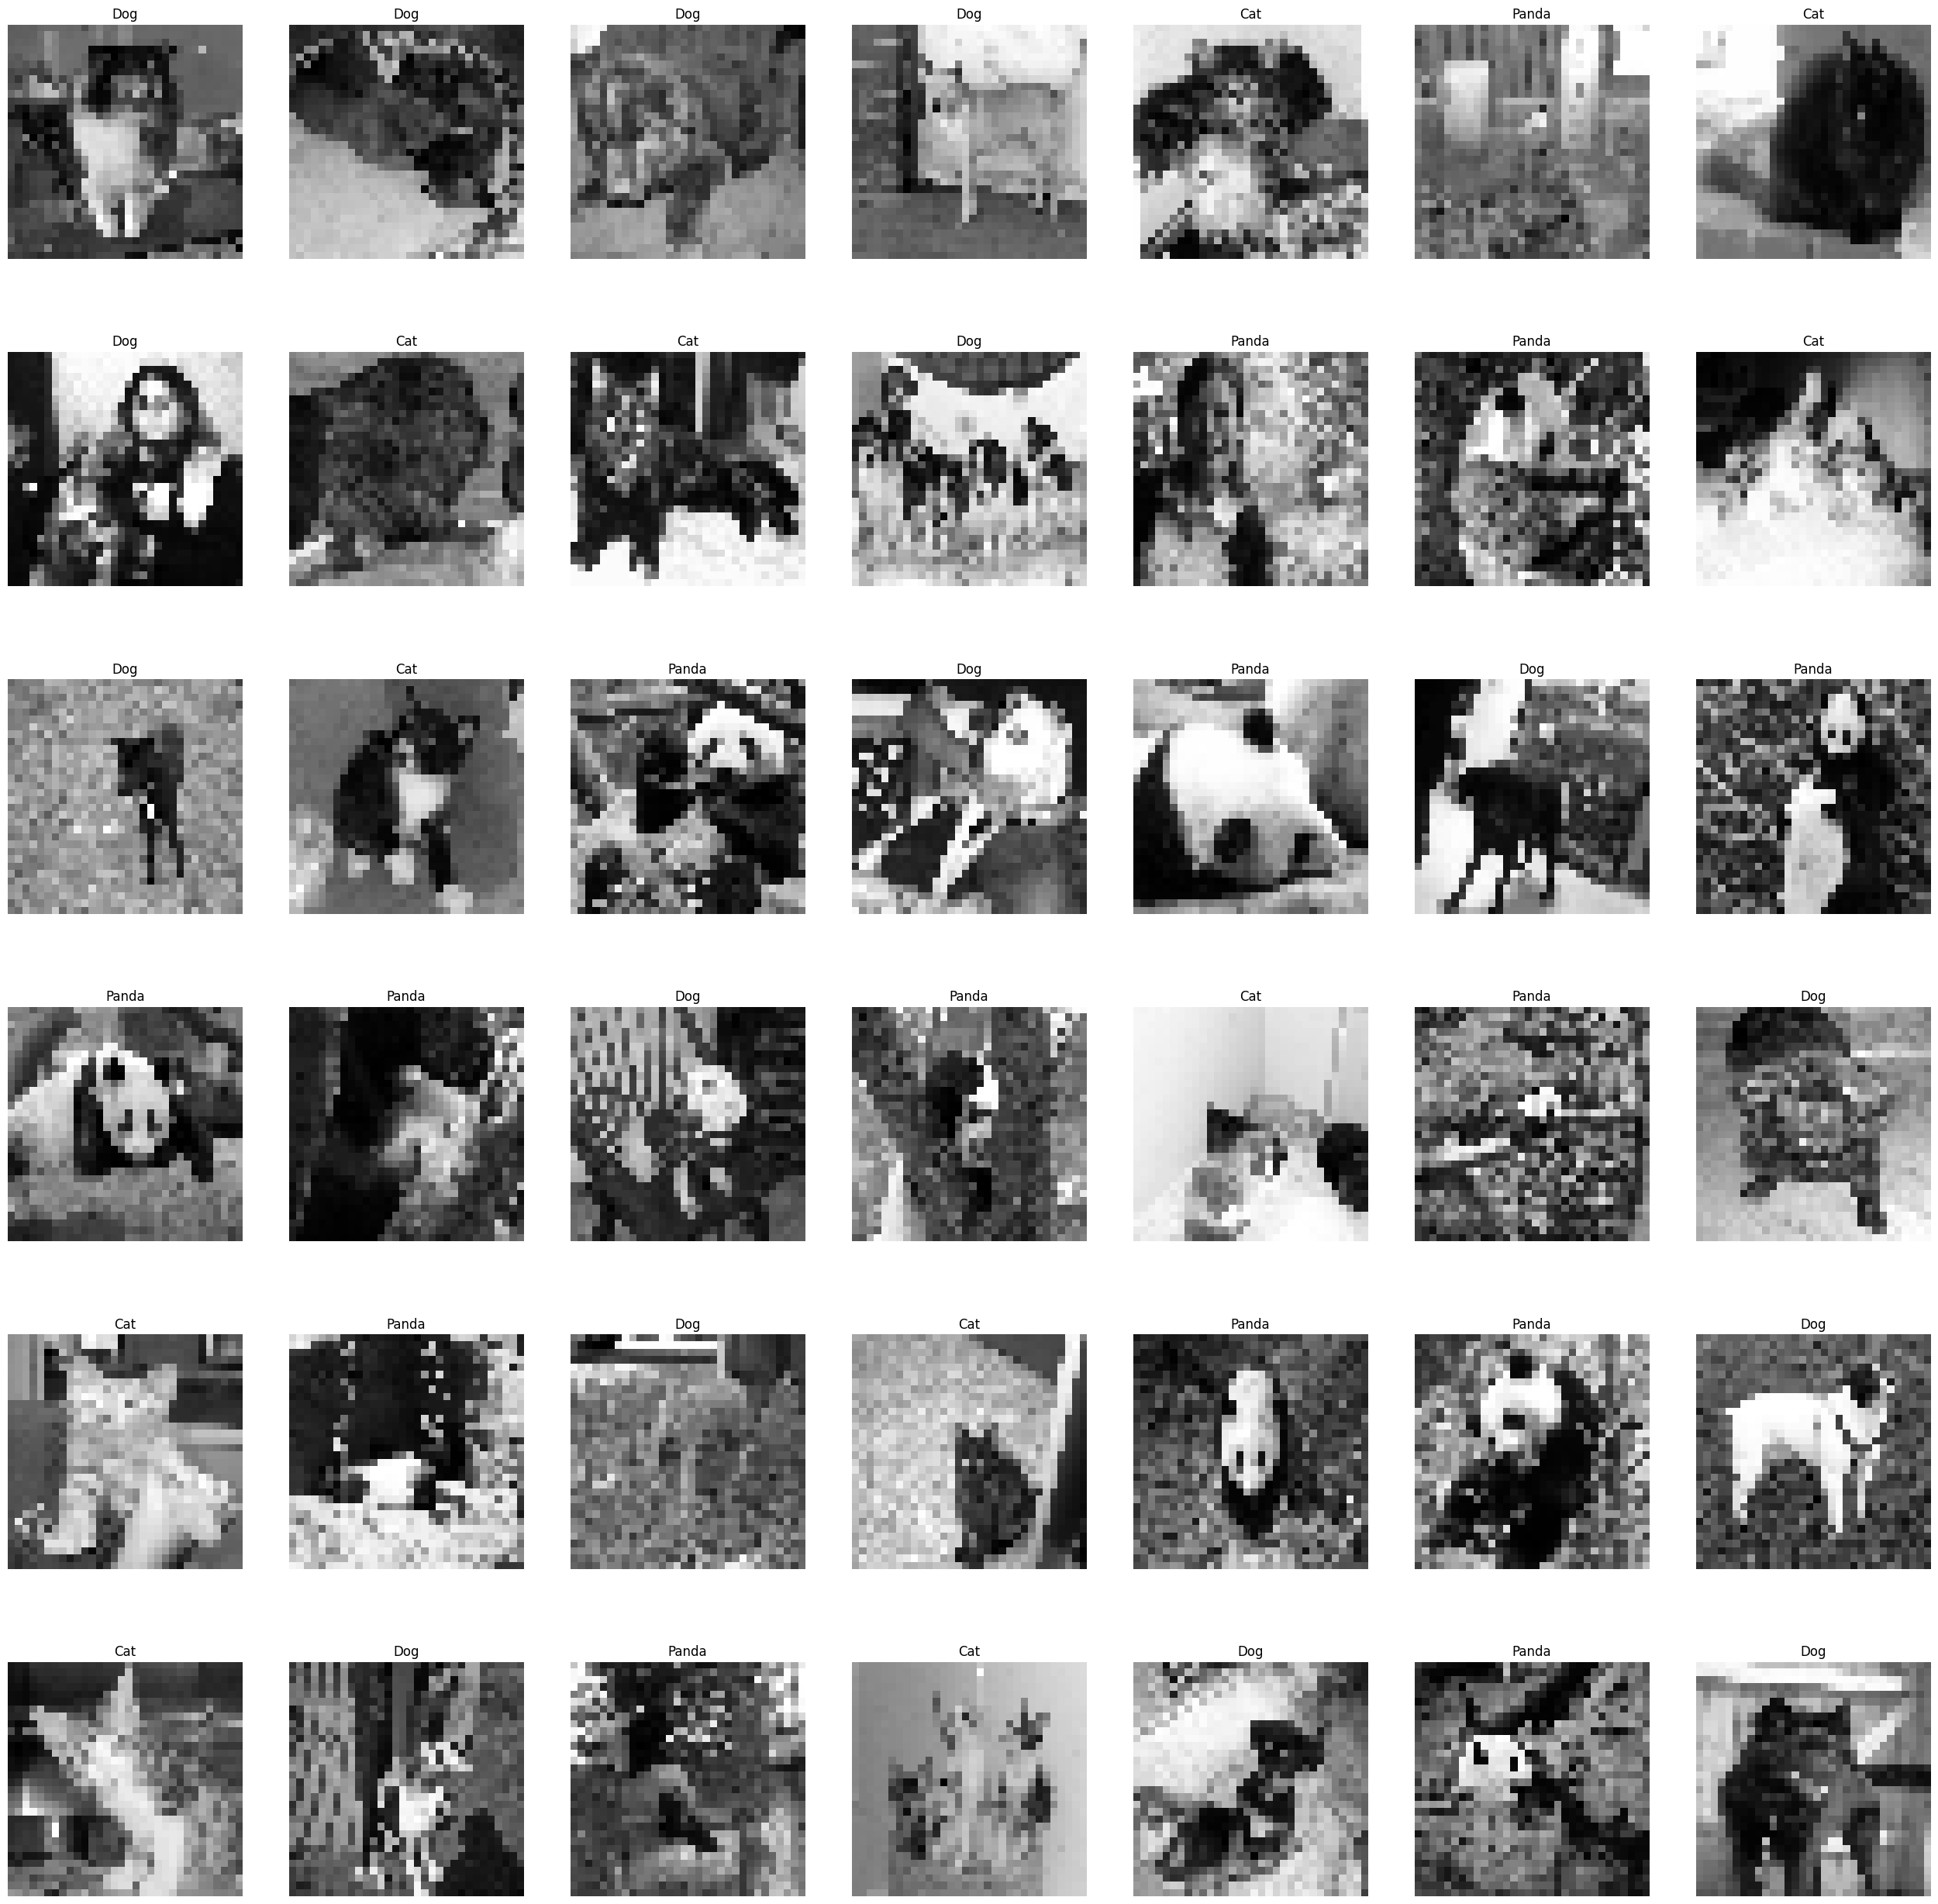

In [112]:
fig, axes = plt.subplots(6, 7, figsize=(32, 32))
label_names = ['Cat', 'Dog', 'Panda']
for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label_names[label])
    ax.axis('off')

plt.show()

# Cross-Validation



In [100]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [101]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 2]
Count: 60
 
Fold 2:
Labels: [1, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2]
Count: 60
 
Fold 3:
Labels: [1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0]
Count: 60
 
Fold 4:
Labels: [1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2]
Count: 60
 
Fold 5:
Labels: [0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 

# Calculating L2 Distance (Euclidean Distance)

In [102]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))


# Calculating L1 Distance (Manhattan Distance)

In [103]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

# k-Nearest Neighbors (kNN) Prediction



In [104]:
from collections import Counter

def knn_prediction(distances, k=1):
    nearest_neighbors = distances[:k]
    labels = [label for _, label in nearest_neighbors]
    label_counts = Counter(labels)
    most_common_label = label_counts.most_common(1)[0][0]

    return most_common_label

# L2 k-Nearest Neighbors (kNN) Cross-Validation with Accuracy



In [105]:
fold_accuracies_2 = []  
avg_accuracies_2 = []  

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l2_distances = []   
      for train_img in train_set:
        distance = l2_distance(valid_img[0], train_img[0])
        l2_distances.append((distance, train_img[1]))
      l2_distances.sort()
      predicted_label = knn_prediction(l2_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)   
    accuracies.append(fold_accuracy)

  fold_accuracies_2.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_2.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_2}")
print(f"Average Fold Accuracies: {avg_accuracies_2}")

K: 1 Average Accuracy: 0.35
K: 2 Average Accuracy: 0.35
K: 3 Average Accuracy: 0.36
K: 4 Average Accuracy: 0.38
K: 5 Average Accuracy: 0.36
K: 6 Average Accuracy: 0.39
K: 7 Average Accuracy: 0.39
K: 8 Average Accuracy: 0.38
K: 9 Average Accuracy: 0.39
K: 10 Average Accuracy: 0.44
K: 11 Average Accuracy: 0.42
K: 12 Average Accuracy: 0.44
K: 13 Average Accuracy: 0.45
K: 14 Average Accuracy: 0.45
K: 15 Average Accuracy: 0.44
K: 16 Average Accuracy: 0.46
K: 17 Average Accuracy: 0.46
K: 18 Average Accuracy: 0.45
K: 19 Average Accuracy: 0.46
K: 20 Average Accuracy: 0.47
K: 21 Average Accuracy: 0.47
K: 22 Average Accuracy: 0.47
K: 23 Average Accuracy: 0.45
K: 24 Average Accuracy: 0.45
K: 25 Average Accuracy: 0.44
K: 26 Average Accuracy: 0.45
K: 27 Average Accuracy: 0.46
K: 28 Average Accuracy: 0.48
K: 29 Average Accuracy: 0.47
K: 30 Average Accuracy: 0.45
Fold Accuracies: [[0.36666666666666664, 0.4, 0.3333333333333333, 0.36666666666666664, 0.3], [0.36666666666666664, 0.4, 0.3333333333333333, 

# L1 k-Nearest Neighbors (kNN) Cross-Validation with Accuracy



In [106]:
fold_accuracies_1 = []  
avg_accuracies_1 = []  

for k in range(1, 31):
  accuracies = []
  for i in range(len(folds) - 1, -1, -1):
    predictions = []

    valid_set = folds[i]
    train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

    for valid_img in valid_set:
      l1_distances = []   
      for train_img in train_set:
        distance = l1_distance(valid_img[0], train_img[0])
        l1_distances.append((distance, train_img[1]))
      l1_distances.sort()
      predicted_label = knn_prediction(l1_distances, k)

      if predicted_label == valid_img[1]:
        predictions.append(1)
      else:
        predictions.append(0)

    fold_accuracy = sum(predictions) / len(predictions)   
    accuracies.append(fold_accuracy)

  fold_accuracies_1.append(accuracies)
  avg_accuracy = sum(accuracies) / len(accuracies)
  avg_accuracies_1.append(avg_accuracy)
  print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

print(f"Fold Accuracies: {fold_accuracies_1}")
print(f"Average Fold Accuracies: {avg_accuracies_1}")

K: 1 Average Accuracy: 0.40
K: 2 Average Accuracy: 0.40
K: 3 Average Accuracy: 0.39
K: 4 Average Accuracy: 0.43
K: 5 Average Accuracy: 0.39
K: 6 Average Accuracy: 0.45
K: 7 Average Accuracy: 0.43
K: 8 Average Accuracy: 0.42
K: 9 Average Accuracy: 0.42
K: 10 Average Accuracy: 0.43
K: 11 Average Accuracy: 0.43
K: 12 Average Accuracy: 0.42
K: 13 Average Accuracy: 0.41
K: 14 Average Accuracy: 0.42
K: 15 Average Accuracy: 0.45
K: 16 Average Accuracy: 0.44
K: 17 Average Accuracy: 0.42
K: 18 Average Accuracy: 0.45
K: 19 Average Accuracy: 0.43
K: 20 Average Accuracy: 0.45
K: 21 Average Accuracy: 0.45
K: 22 Average Accuracy: 0.46
K: 23 Average Accuracy: 0.45
K: 24 Average Accuracy: 0.42
K: 25 Average Accuracy: 0.44
K: 26 Average Accuracy: 0.45
K: 27 Average Accuracy: 0.42
K: 28 Average Accuracy: 0.43
K: 29 Average Accuracy: 0.43
K: 30 Average Accuracy: 0.43
Fold Accuracies: [[0.43333333333333335, 0.35, 0.35, 0.48333333333333334, 0.36666666666666664], [0.43333333333333335, 0.35, 0.35, 0.48333333

# Visualizing Cross-validation Accuracy

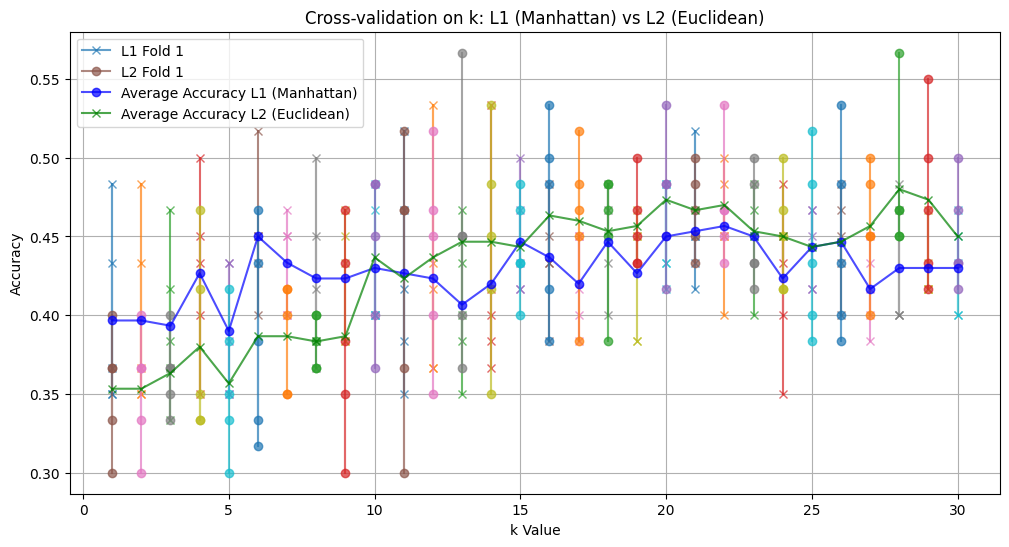

In [107]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

for k in range(30):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='x', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='o', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='x')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

plt.grid(True)
plt.legend()

plt.show()

# Head 5 predictions Euclidean (L2)

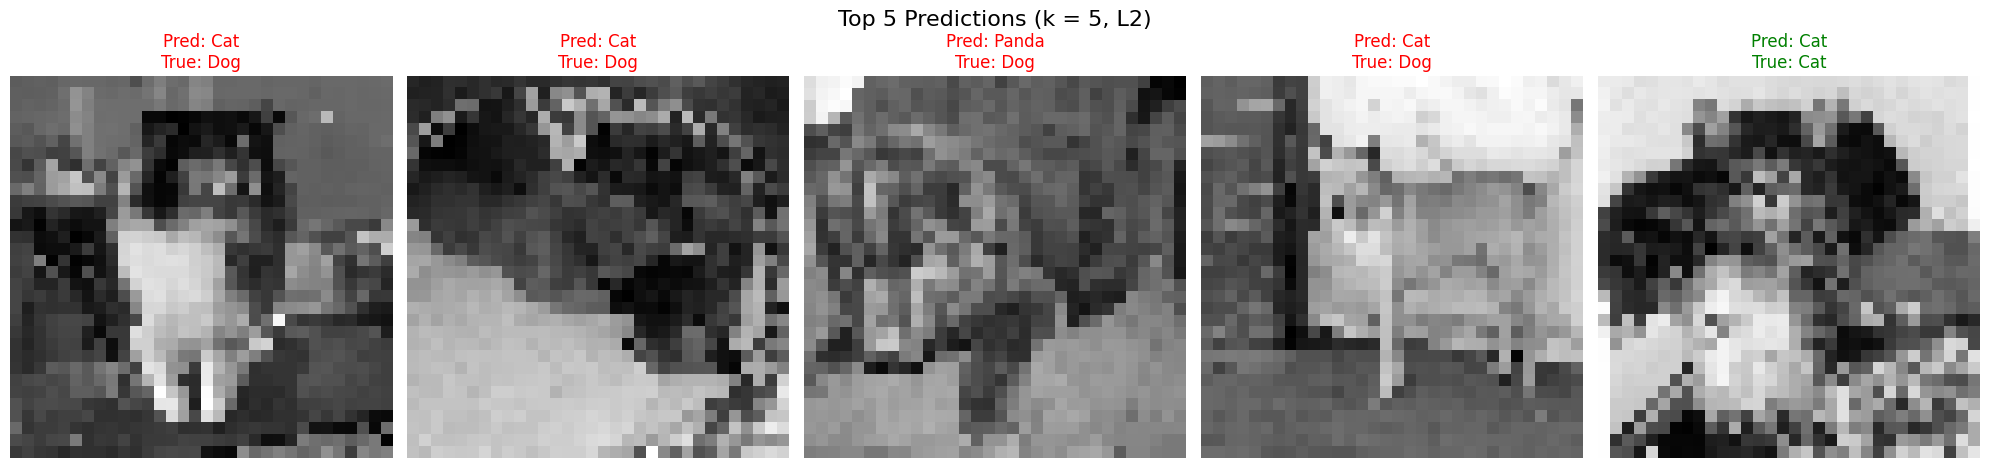

In [108]:
test_samples = train_data[:5]

k_best = 5
distance_function = l2_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
label_names = ['Cat', 'Dog', 'Panda']
for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {label_names[predicted_label]}\nTrue: {label_names[true_label]}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()


# Head 5 predictions Manhattan (L1)

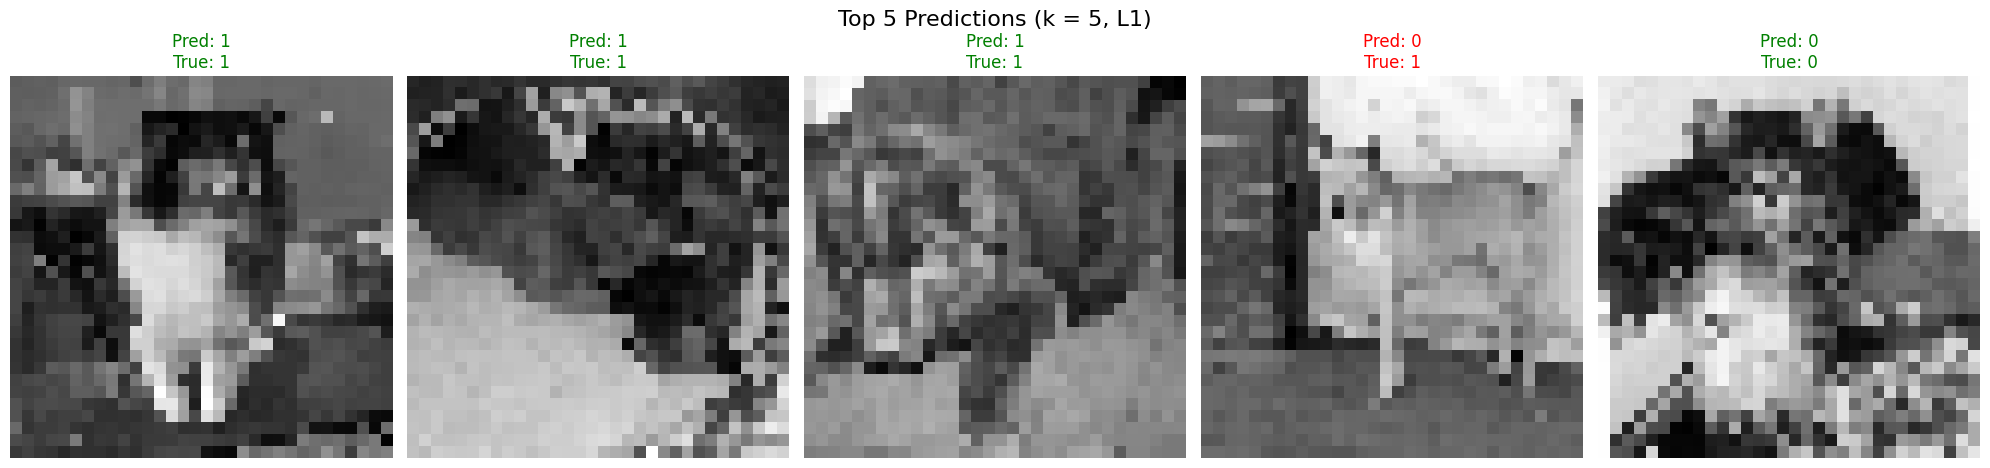

In [109]:
test_samples = train_data[:5]

k_best = 5
distance_function = l1_distance

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}", color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"Top 5 Predictions (k = {k_best}, {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16)
plt.tight_layout()
plt.show()

# Discussion :
According to the 5-fold cross-valuation findings, the k-NN classifier using Euclidean (L2) distance consistently outperformed Manhattan (L1) distance for all values of K.  L1 demonstrated a considerable edge in this grayscale picture categorization test, achieving 46% (at K=22). However, L2 achieved the best accuracy of 47% (at K=20 and 21).  This discrepancy in performance is undoubtedly influenced by the characteristics of the pixel-based picture.  Since Euclidean distance penalizes greater pixel discrepancies more severely, it may be able to capture form and intensity changes among animal photos more accurately, especially in a lower-dimensional space like 32x32.  L2 is less sensitive to such variations, which suggests that it is less effective at distinguishing between related picture classes, such dogs and cats.  Generally speaking, raising K increased both measures' accuracy; The benefit of smoothing forecasts with additional neighbors is seen here, particularly when dealing with visually noisy or ambiguous samples. Using raw pixel values, which may not capture higher-level patterns, and the high computing cost of k-NN during inference times are two of this method's drawbacks. To improve accuracy, future research might look at feature extraction methods, dimensionality reduction, or more sophisticated models like convolutional neural networks (CNNs).